## Import Libraries

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.ticker import StrMethodFormatter, NullFormatter
%matplotlib inline
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [2]:
### define constants for calculations
cp=1004.; Rd=287.; Rv=461.5; eps = Rd/Rv; L = 2.5e6

def open_iMet(imet_filepath):
    '''Opens iMet Sounding to a pandas dataframe'''
    df = pd.read_table(open(imet_filepath, errors='ignore'),   ###reading in file as a pandas dataframe
                  skiprows=[1,2], sep=r'\s+', index_col = False)
    df['Temp'] = df['Temp']+273.15 ###Converts to K
    
    return df
        

## Get radiosonde file for Figure S1

In [3]:
FilePath = '/Users/cneumaie/Desktop/Research/BACS_Modeling/Soundings/*.txt'
files = sorted(glob(FilePath))
df = open_iMet(files[0])

/var/folders/4q/by3lqw_x3cd0qthd139_q_zw000cm7/T/ipykernel_14032/3307209334.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_table(open(imet_filepath, errors='ignore'),   ###reading in file as a pandas dataframe


## Plot Figure S1

<Figure size 4200x4200 with 0 Axes>

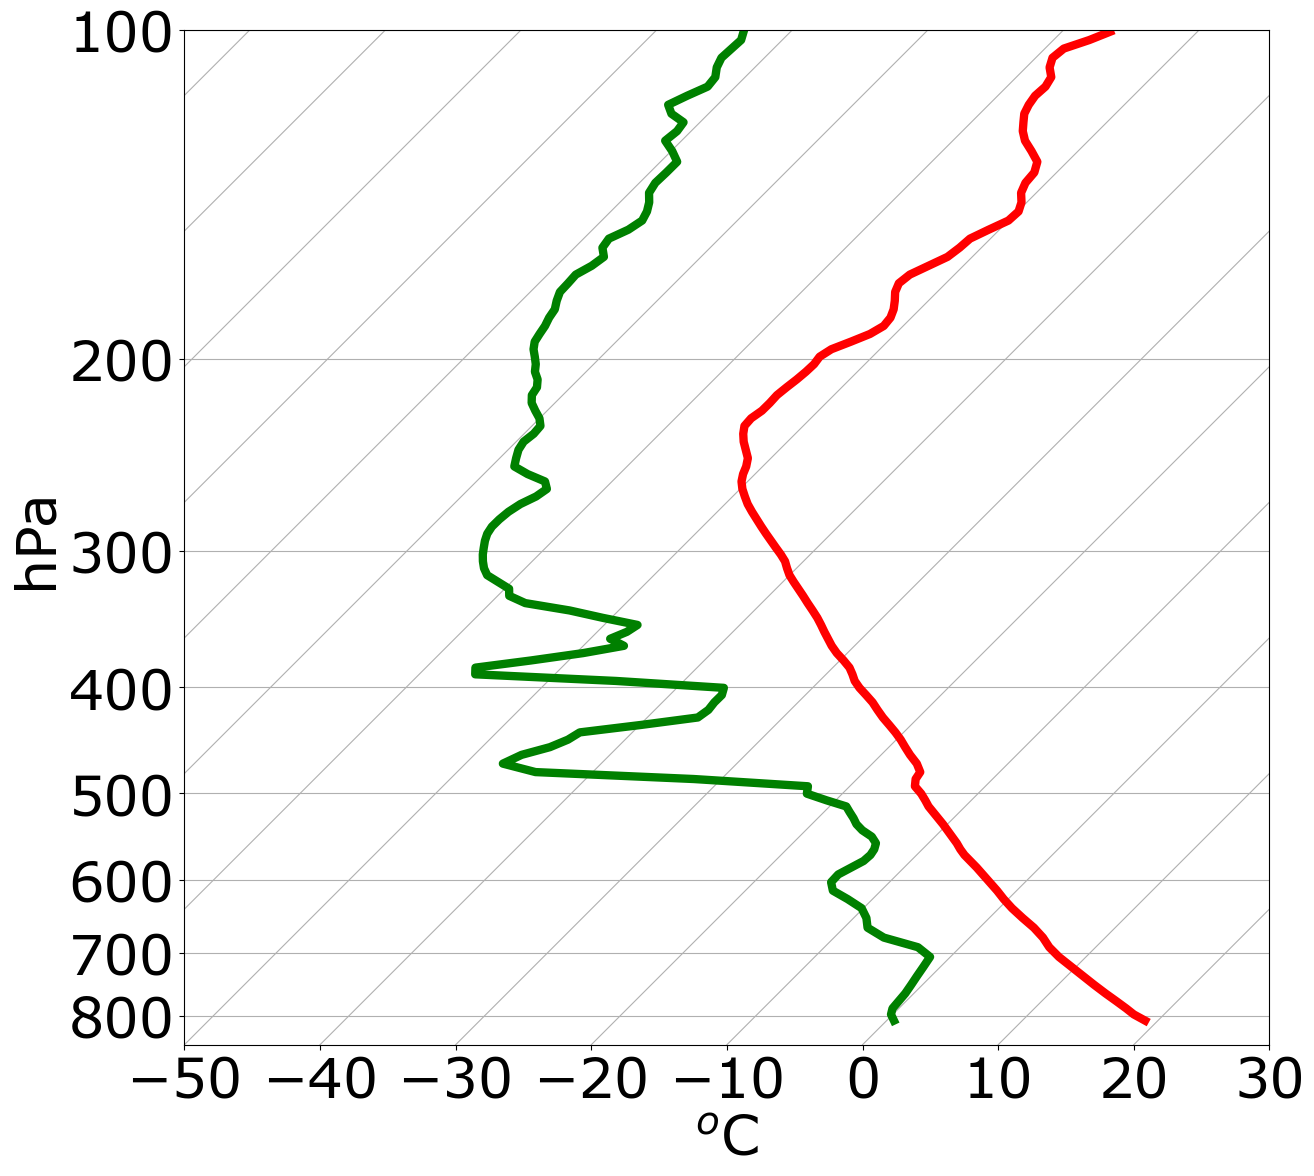

In [4]:
SavePath = '/Users/cneumaie/Desktop/Research/BACS_Modeling/Soundings/'
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 40
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['text.color'] = 'black'
plt.rcParams['lines.linewidth'] = 2
i = 50
plt.figure(dpi = 300)
res2 = 25
skew = SkewT(rotation = 45)
date = str(df['UTC_Date'][0]) ###get date of launch
date = date.replace('/', '')
time = str(df['UTC_Time'][0]) ##get time of launch in UTC
p = df['Press'].rolling(i, center = True).mean().values*units.mbar ### Pressure, using metpy to get units on variable to do metpy sounding
p1 = df['Press'].rolling(i, center = True).mean().dropna()
z = df['Alt_AGL'].rolling(i, center = True).mean()   ###Height Above Ground Level (m)
t = df['Temp'].rolling(i, center = True).mean().apply(lambda x: np.sum(x * p1)/np.sum(p1)) -273.15 ### Temperature (C)
td = df['DP'].rolling(i, center = True).mean().apply(lambda x: np.sum(x * p1)/np.sum(p1)) ### Dewpoint Temperature (C)
rh = df['RelHum'] ###Relative Humidity (%)

ar = df['Ascent']   ### Ascent Rate (m/s)
mr = df['Mix_Rat'] ### Mixing Ratio (g/kg)

skew.plot(p[::res2],t[::res2], 'r', linewidth = 6)

skew.plot(p[::res2],td[::res2], 'g', linewidth = 6)

skew.ax.set_ylim(850, 100)
skew.ax.set_xlim(-50,30)

plt.ylabel('hPa')
plt.xlabel('$^o$C')
SavePath = '/Users/cneumaie/Downloads/'
plt.savefig(SavePath+'IOP3env_smoothed_CPTrains_final', dpi = 600)
plt.show()
plt.close()

